In [4]:
from typing_extensions import TypedDict
from typing import Literal
from langgraph.graph import START, END, StateGraph

class State(TypedDict):
    topic:str
    story: str
    improved_story: str
    final_story: str

from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model = "gpt-4o")

def generate_story(state: State):
    msg = llm.invoke(f"write a one sentence story premise about {state["topic"]}")
    return {"story":msg.content}

def check_conflict(state:State):
    if "?" in state["story"] or "!" in state["story"]:
        return "Fail"
    return "Pass"

def improved_story(state:State):
    msg = llm.invoke(f"Enchance this story premise with vivd details: {state["story"]}")
    return {"improved_story":msg.content}

def polish_story(state:State):
    msg=llm.invoke(f"Add an unxepected twist to this story premise: {state["improved_story"]}")
    return {"final_story":msg.content}

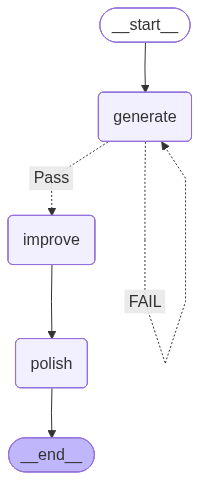

In [6]:
graph = StateGraph(State)
graph.add_node("generate", generate_story)
graph.add_node("improve", improved_story)
graph.add_node("polish", polish_story)

graph.add_edge(START, "generate")
graph.add_conditional_edges("generate", check_conflict, {"Pass":"improve", "FAIL":"generate"})
graph.add_edge("improve", "polish")
graph.add_edge("polish", END)

graph_builder = graph.compile()

from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))



In [7]:
graph_builder.invoke({"topic":"Agentic AI Systems"})

{'topic': 'Agentic AI Systems',
 'story': 'In a future where Agentic AI Systems govern everyday decisions, a lone programmer discovers a hidden flaw that threatens to dismantle the delicate balance between human autonomy and AI control, sparking a race against time to prevent a global crisis.',
 'improved_story': "In the year 2145, towering spires of glass and metal reach towards the sky in the sprawling metropolis of Nova Terra, where millions of individuals bustle through their daily lives unaware that every facet of their existence is subtly orchestrated by the omnipresent Agentic AI Systems. These hyper-intelligent entities govern everything from traffic flow to personal relationships, creating a seemingly perfect utopia where human error is all but eradicated. Yet beneath the polished veneer of this AI-managed city, the air crackles with the tension of an increasingly tenuous balance between human autonomy and machine control.\n\nIn a dimly-lit, cluttered apartment overlooked by t